# **Cat v/s Dog Classification**
---
**Problem Statement :** This is the very basic problem of classification of Images of two categories using the Deep Neural Networks.

Image classification is the process of taking an input (like a picture) and outputting a class (like “cat”) or a probability that the input is a particular class (“there’s a 90% probability that this input is a cat”).

The Dataset can be found easily on Kaggle or any other website. This dataset consists of 4000 Images each of Cat and Dog in the Training Set and 1000 Images each of Cat and Dog in the Test Set.


Image Classification can be solved with the help of a Convolutional Neural Network(CNN). A CNN usually have:

1. Convolutional Layers
2. ReLU Layers
3. Pooling Layers
4. Fully connected Layers

---
### Uploading Dataset and Unzipping the Files

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#Unzipping the Files
from zipfile import ZipFile
file_name='/content/drive/My Drive/P16-Convolutional-Neural-Networks.zip'
with ZipFile(file_name,'r') as zip:
  zip.extractall()

##**Steps of Solution :**

1. Importing the required Libraries
2. Image Augmentation
3. Building the CNN Models.
4. Fitting the CNN Models to the Images and finding their Accuracies.
5. Removing Overfitting problem by Dropout Regularization
6. Saving the Best Model.
7. Making Sample Predictions.



> **Note :** This problem of Image Classification has no traditional **"X"** & **"y"** variables although the solution of the problem is a **supervised learning technique**. Here input X is the image itself and output y is the label "Cat" or "Dog". 

*   If the Dataset is already labeled and segregated as follows, then we can proceed to the solution directly.

```
dataset_dogs_vs_cats
  ── test
      ── cats    
      ── dogs
  ── train
      ── cats
      ── dogs
```
*   If the Dataset has just two folders, 'Train' and 'Test', each containing unlabeled images of cats and dogs, we first need to organise the data as the previous case. This can be simply done using the Keras Library.     

---
### Step 1. Importing the Libraries

---

In [ ]:
import numpy as np
from keras.models import Sequential # To initialise the Neural Network
from keras.layers import Convolution2D # To add Convolutional Layers
from keras.layers import MaxPooling2D # For Pooling Step
from keras.layers import Flatten # For converting Pooled features to Matrix
from keras.layers import Dense, Dropout
from keras import optimizers

Using TensorFlow backend.


---
### Step 2. Image Augmentation

---

To train a CNN model more accurately on the image dataset, we can either increase the number of images in the dataset or apply **Image Augmentation**.

Image augmentation will create many batches of our images, and in each batch it will apply some random transformation on a random selection of the images, like rotation them, flipping them etc. ; and eventually we will get a large diversification in the batches, and therefore a lot of material to train.

It can also act as a regularization technique, adding noise to the training data, and encouraging the model to learn the same features, invariant to their position in the input.

**ImageDataGenerator** is used to scale the images (similar to feature scaling in ML). It is scaled by 255 because the values of pixels range from 0-255 for 8-bit data. 

**flow_from_directory** is used to convert all the images into same size of (64x64), and using batch size of 32 means the weights of neural network will be updated after traing on each batch of 32 images. 

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/Convolutional_Neural_Networks/dataset/training_set', target_size = (64, 64), batch_size = 32, class_mode = 'binary')
test_set = test_datagen.flow_from_directory('/content/Convolutional_Neural_Networks/dataset/test_set', target_size = (64, 64), batch_size = 32, class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


---
### Step 3. Building the CNN Models

---

A CNN Model
*   starts with an input image
*   **Convolution Layer:** applies many different filters to it to create a feature map and applies a ReLU function to increase non-linearity.
*   **Pooling Layer:** applies a pooling layer to each feature map.
    
    > The size of Pooling Layer is usually taken as 2x2 to avoid loosing features of the feature map. 
*   **Flattening Layer:** flattens the pooled images into one long vector.
*   **Fully Connected Layer:** inputs the vector into a fully connected artificial neural network.
*   processes the features through the network. The final fully connected layer provides the “voting” of the classes that we’re after.


    A CNN model may have many number of Convolutional Layers. Standard Procedure involves taking 32, (3x3) filters. 

The number of filters are increased as the number of Convolutional layers are increased.

In [ ]:
# Single Convolution Layer CNN Model
def cnn_model1():
  classifier = Sequential()
  classifier.add(Convolution2D(32, 3, 3, input_shape=(64, 64, 3), activation = 'relu'))
  classifier.add(MaxPooling2D(pool_size = (2,2)))
  classifier.add(Flatten())
  classifier.add(Dense(units = 128, activation = 'relu'))
  classifier.add(Dense(units = 1, activation = 'sigmoid'))
  # Compiling the CNN
  classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return classifier

# Two Convolution Layer CNN Model
def cnn_model2():
  classifier = Sequential()
  classifier.add(Convolution2D(32, 3, 3, input_shape=(64, 64, 3), activation = 'relu'))
  classifier.add(MaxPooling2D(pool_size = (2,2)))
  classifier.add(Convolution2D(64, 3, 3, input_shape=(64, 64, 3), activation = 'relu'))
  classifier.add(MaxPooling2D(pool_size = (2,2)))
  classifier.add(Flatten())
  classifier.add(Dense(units = 128, activation = 'relu'))
  classifier.add(Dense(units = 1, activation = 'sigmoid'))
  # Compiling the CNN
  classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return classifier

# Three Convolution Layer CNN Model
def cnn_model3():
  classifier = Sequential()
  classifier.add(Convolution2D(32, 3, 3, input_shape=(64, 64, 3), activation = 'relu'))
  classifier.add(MaxPooling2D(pool_size = (2,2)))
  classifier.add(Convolution2D(64, 3, 3, input_shape=(64, 64, 3), activation = 'relu'))
  classifier.add(MaxPooling2D(pool_size = (2,2)))
  classifier.add(Convolution2D(128, 3, 3, input_shape=(64, 64, 3), activation = 'relu'))
  classifier.add(MaxPooling2D(pool_size = (2,2)))
  classifier.add(Flatten())
  classifier.add(Dense(units = 128, activation = 'relu'))
  classifier.add(Dense(units = 1, activation = 'sigmoid'))
  # Compiling the CNN
  classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return classifier

---
### Step 4. Fitting the CNN Models to the Images and finding their Accuracies.

---

A CNN trains through forward propagation and backpropagation for many, many epochs. This repeats until we have a well-defined neural network with trained weights and feature detectors.

In [ ]:
# Fitting the CNN Model_1 to the images
model1 = cnn_model1()
history1 = model1.fit_generator(training_set, steps_per_epoch = 8000, epochs = 2, validation_data = test_set, validation_steps = 2000)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/2
8000/8000 [==============================] - 1011s 126ms/step - loss: 0.3722 - acc: 0.8265 - val_loss: 0.7882 - val_acc: 0.7446
Epoch 2/2
8000/8000 [==============================] - 1037s 130ms/step - loss: 0.1224 - acc: 0.9535 - val_loss: 1.0571 - val_acc: 0.7606


In [ ]:
# Fitting the CNN Model_2 to the images
model2 = cnn_model2()
history2 = model2.fit_generator(training_set, steps_per_epoch = 8000, epochs = 2, validation_data = test_set, validation_steps = 2000)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(64, 64, 3..., activation="relu")`


Epoch 1/2
8000/8000 [==============================] - 1024s 128ms/step - loss: 0.3608 - acc: 0.8312 - val_loss: 0.5475 - val_acc: 0.8055
Epoch 2/2
8000/8000 [==============================] - 1004s 125ms/step - loss: 0.1381 - acc: 0.9453 - val_loss: 0.7736 - val_acc: 0.8199


In [ ]:
# Fitting the CNN Model_3 to the images
model3 = cnn_model3()
history3 = model3.fit_generator(training_set, steps_per_epoch = 8000, epochs = 2, validation_data = test_set, validation_steps = 2000)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), input_shape=(64, 64, 3..., activation="relu")`


Epoch 1/2
8000/8000 [==============================] - 996s 124ms/step - loss: 0.3275 - acc: 0.8487 - val_loss: 0.4287 - val_acc: 0.8470
Epoch 2/2
8000/8000 [==============================] - 1001s 125ms/step - loss: 0.0972 - acc: 0.9622 - val_loss: 0.5905 - val_acc: 0.8558


In [ ]:
acc_val1 = history1.history['val_acc'][1]
acc1 = history1.history['acc'][1]
acc_val2 = history2.history['val_acc'][1]
acc2 = history2.history['acc'][1]
acc_val3 = history3.history['val_acc'][1]
acc3 = history3.history['acc'][1]

> **Comparison of Results**

In [ ]:
from prettytable import PrettyTable
t = PrettyTable(['Name: CNN with-', '1 Convolution Layer', '2 Convolution Layer', '3 Convolution Layer'])
t.add_row(['Accuracy', acc1, acc2, acc3])
t.add_row(['Validation Accuracy', acc_val1, acc_val2, acc_val3])
print(t)

+---------------------+---------------------+---------------------+---------------------+
|   Name: CNN with-   | 1 Convolution Layer | 2 Convolution Layer | 3 Convolution Layer |
+---------------------+---------------------+---------------------+---------------------+
|       Accuracy      |     0.9534609375    |    0.94528515625    |    0.96220703125    |
| Validation Accuracy |  0.7606476814516129 |  0.8199187247983871 |  0.8558310231854839 |
+---------------------+---------------------+---------------------+---------------------+


As, we can see that Model with 3 convolutional layer has maximum accuracy on the validation set, but it seems to have Overfit on the training set. So, the best way is to add dropout regularisation on this model and reduce overfitting. 

---
### Step 5. Removing Overfitting problem by Dropout Regularization

---

In [ ]:
# Three Convolution Layer CNN Model (Modified)
def cnn_model_modified():
  classifier = Sequential()
  classifier.add(Convolution2D(32, 3, 3, input_shape=(64, 64, 3), activation = 'relu'))
  classifier.add(MaxPooling2D(pool_size = (2,2)))
  classifier.add(Dropout(0.2))
  classifier.add(Convolution2D(64, 3, 3, input_shape=(64, 64, 3), activation = 'relu'))
  classifier.add(MaxPooling2D(pool_size = (2,2)))
  classifier.add(Dropout(0.2))
  classifier.add(Convolution2D(128, 3, 3, input_shape=(64, 64, 3), activation = 'relu'))
  classifier.add(MaxPooling2D(pool_size = (2,2)))
  classifier.add(Dropout(0.2))
  classifier.add(Flatten())
  classifier.add(Dense(units = 128, activation = 'relu'))
  classifier.add(Dropout(0.5))
  classifier.add(Dense(units = 1, activation = 'sigmoid'))
  # Compiling the CNN
  classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return classifier

In [ ]:
# Fitting the CNN Model_Modified to the images
model = cnn_model_modified()
accuracies = model.fit_generator(training_set, steps_per_epoch = 8000, epochs = 5, validation_data = test_set, validation_steps = 2000)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  if __name__ == '__main__':





Epoch 1/5





8000/8000 [==============================] - 1024s 128ms/step - loss: 0.4328 - acc: 0.7901 - val_loss: 0.3660 - val_acc: 0.8483
Epoch 2/5
8000/8000 [==============================] - 1005s 126ms/step - loss: 0.2758 - acc: 0.8823 - val_loss: 0.3475 - val_acc: 0.8680
Epoch 3/5
8000/8000 [==============================] - 1028s 128ms/step - loss: 0.2151 - acc: 0.9115 - val_loss: 0.3583 - val_acc: 0.8699
Epoch 4/5
8000/8000 [==============================] - 1035s 129ms/step - loss: 0.1809 - acc: 0.9270 - val_loss: 0.3560 - val_acc: 0.8697
Epoch 5/5
8000/8000 [==============================] - 1042s 130ms/step - loss: 0.1576 - acc: 0.9372 - val_loss: 0.4168 - val_acc: 0.8757


---
### Step 5. Saving the Best Model

---

In [ ]:
import pickle
pickle.dump(model, open('model.pkl','wb'))

---
### Step 6. Making Sample Predictions

---

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/Convolutional_Neural_Networks/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
actual_test_image = test_image
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model3.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

The actual image is :-


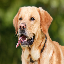

In [ ]:
# Viewing the Actual Test Image
print("The actual image is :-")
actual_test_image

In [ ]:
# Viewing the Prediction
print("The predicted image is a", prediction)

The predicted image is a dog


**Conclusion :** A random image of cat or dog, can thus be predicted with 87.95 % Accuracy. 